In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [5]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
print("Training data shape: ",train.shape)

Training data shape:  (614, 13)


In [7]:
print("Testing data shape: ",test.shape)

Testing data shape:  (367, 12)


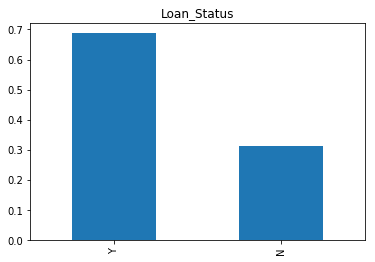

In [8]:
train["Loan_Status"].value_counts(normalize=True).plot.bar(title = 'Loan_Status')

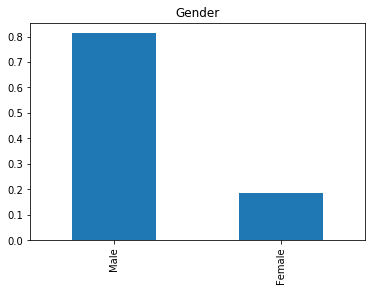

In [9]:
train['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender')

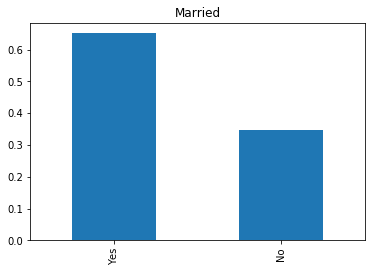

In [10]:
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

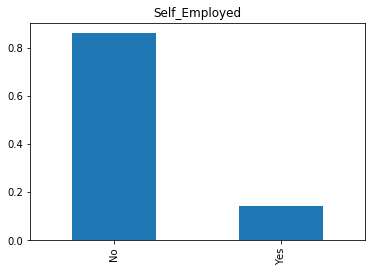

In [11]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

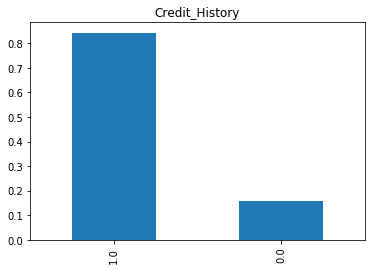

In [12]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

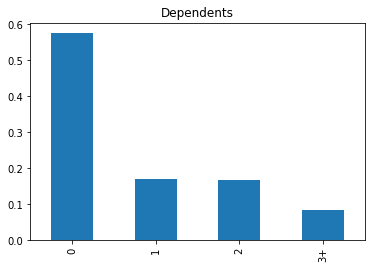

In [13]:
train['Dependents'].value_counts(normalize=True).plot.bar(title="Dependents")

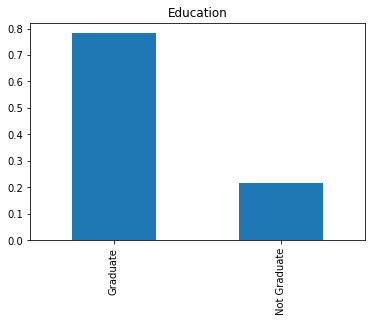

In [14]:
train["Education"].value_counts(normalize=True).plot.bar(title = "Education")

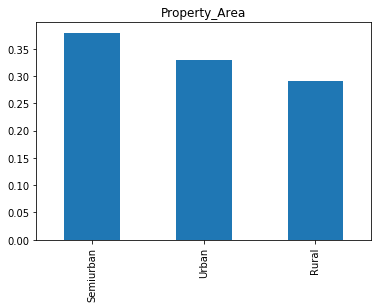

In [15]:
train["Property_Area"].value_counts(normalize=True).plot.bar(title="Property_Area")

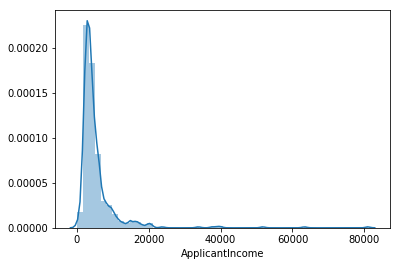

In [16]:
sns.distplot(train["ApplicantIncome"]);

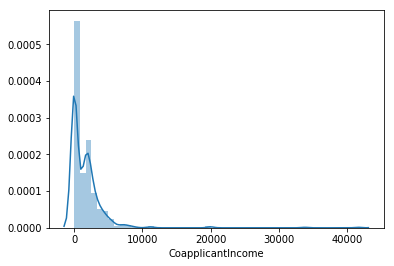

In [17]:
sns.distplot(train["CoapplicantIncome"]);

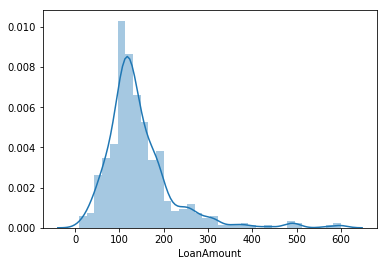

In [18]:
df=train.dropna()
sns.distplot(df['LoanAmount']);

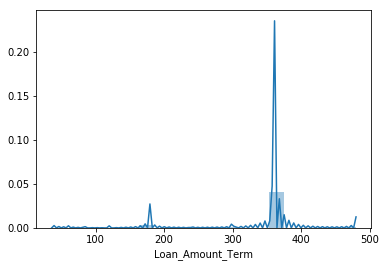

In [19]:
df = train.dropna()
sns.distplot(df["Loan_Amount_Term"]);

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


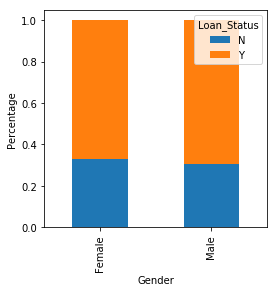

In [20]:
print(pd.crosstab(train["Gender"],train["Loan_Status"]))
Gender = pd.crosstab(train["Gender"],train["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


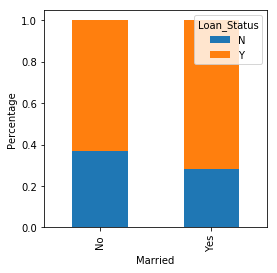

In [21]:
print(pd.crosstab(train["Married"],train["Loan_Status"]))
Married=pd.crosstab(train["Married"],train["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


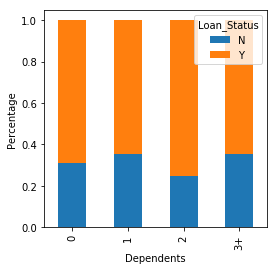

In [22]:
print(pd.crosstab(train['Dependents'],train["Loan_Status"]))
Dependents = pd.crosstab(train['Dependents'],train["Loan_Status"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Dependents")
plt.ylabel("Percentage")
plt.show()

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


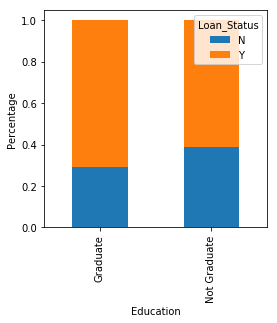

In [23]:
print(pd.crosstab(train["Education"],train["Loan_Status"]))
Education = pd.crosstab(train["Education"],train["Loan_Status"])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Education")
plt.ylabel("Percentage")
plt.show()

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


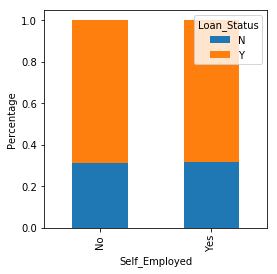

In [24]:
print(pd.crosstab(train["Self_Employed"],train["Loan_Status"]))
SelfEmployed = pd.crosstab(train["Self_Employed"],train["Loan_Status"])
SelfEmployed.div(SelfEmployed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Self_Employed")
plt.ylabel("Percentage")
plt.show()

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


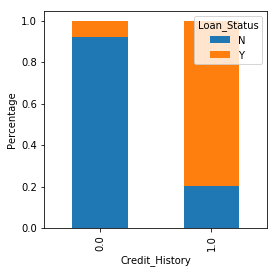

In [25]:
print(pd.crosstab(train["Credit_History"],train["Loan_Status"]))
CreditHistory = pd.crosstab(train["Credit_History"],train["Loan_Status"])
CreditHistory.div(CreditHistory.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Credit_History")
plt.ylabel("Percentage")
plt.show()

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


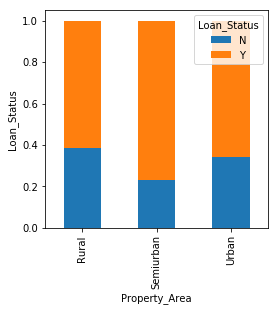

In [26]:
print(pd.crosstab(train["Property_Area"],train["Loan_Status"]))
PropertyArea = pd.crosstab(train["Property_Area"],train["Loan_Status"])
PropertyArea.div(PropertyArea.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Property_Area")
plt.ylabel("Loan_Status")
plt.show()

In [27]:
train["TotalIncome"]=train["ApplicantIncome"]+train["CoapplicantIncome"]

In [28]:
bins =[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train["TotalIncome_bin"]=pd.cut(train["TotalIncome"],bins,labels=group)

Loan_Status       N    Y
TotalIncome_bin         
Low              14   10
Average          32   87
High             65  159
Very High        81  166


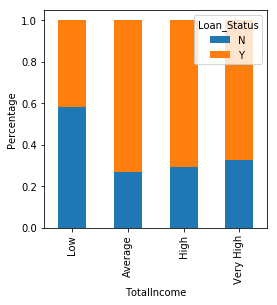

In [29]:
print(pd.crosstab(train["TotalIncome_bin"],train["Loan_Status"]))
TotalIncome = pd.crosstab(train["TotalIncome_bin"],train["Loan_Status"])
TotalIncome.div(TotalIncome.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("TotalIncome")
plt.ylabel("Percentage")
plt.show()

In [30]:
bins = [0,100,200,700]
group=['Low','Average','High']
train["LoanAmount_bin"]=pd.cut(df["LoanAmount"],bins,labels=group)

Loan_Status      N    Y
LoanAmount_bin         
Low             38   86
Average         83  207
High            27   39


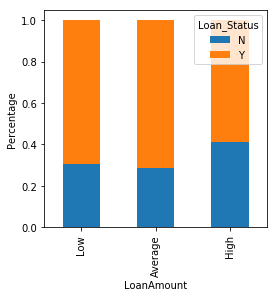

In [31]:
print(pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"]))
LoanAmount=pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"])
LoanAmount.div(LoanAmount.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("LoanAmount")
plt.ylabel("Percentage")
plt.show()

In [32]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

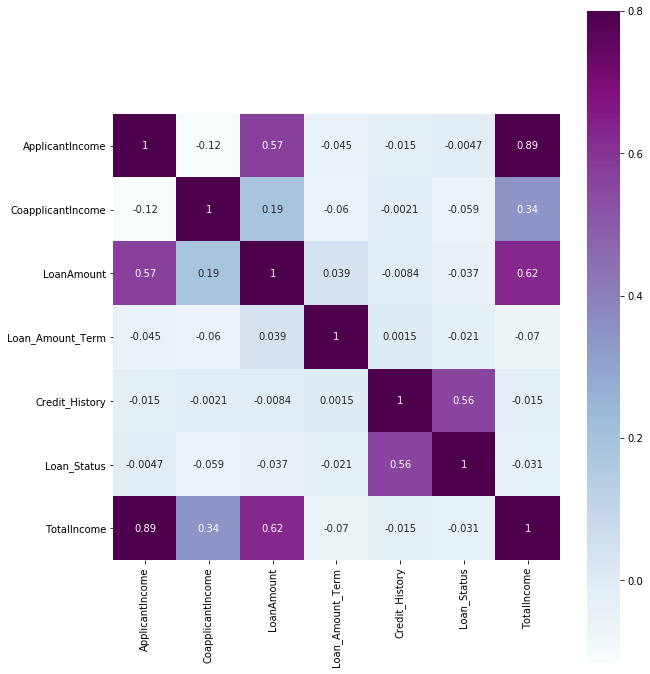

In [33]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True);

In [34]:
train.isnull().sum()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
TotalIncome            0
TotalIncome_bin        0
LoanAmount_bin       134
dtype: int64

In [35]:
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
train["Married"].fillna(train["Married"].mode()[0],inplace=True)
train['Dependents'].fillna(train["Dependents"].mode()[0],inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)

In [36]:
train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [37]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)

In [38]:
train["Loan_Amount_Term"].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [39]:
train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)

In [40]:
test["Gender"].fillna(test["Gender"].mode()[0],inplace=True)
test['Dependents'].fillna(test["Dependents"].mode()[0],inplace=True)
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0],inplace=True)
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0],inplace=True)
test["Credit_History"].fillna(test["Credit_History"].mode()[0],inplace=True)
test["LoanAmount"].fillna(test["LoanAmount"].median(),inplace=True)

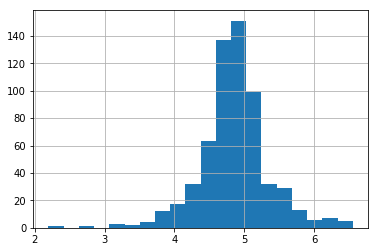

In [41]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

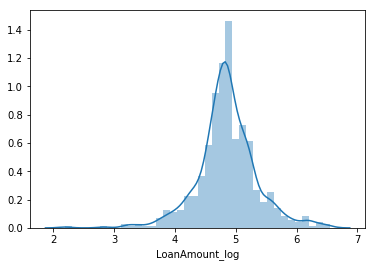

In [42]:
sns.distplot(train["LoanAmount_log"])

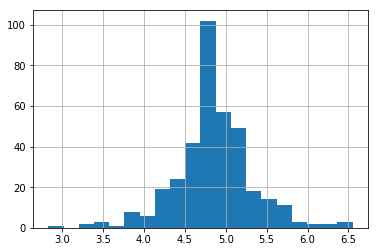

In [43]:
test["LoanAmount_log"]=np.log(train["LoanAmount"])
test['LoanAmount_log'].hist(bins=20)

In [44]:
train["TotalIncome"]=train["ApplicantIncome"]+train["CoapplicantIncome"]

In [45]:
train[["TotalIncome"]].head()

,TotalIncome
0,5849.0
1,6091.0
2,3000.0
3,4941.0
4,6000.0


In [46]:
test["TotalIncome"]=test["ApplicantIncome"]+test["CoapplicantIncome"]

In [47]:
test[["TotalIncome"]].head()

,TotalIncome
0,5720
1,4576
2,6800
3,4886
4,3276


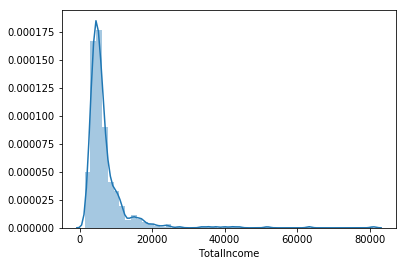

In [48]:
sns.distplot(train["TotalIncome"])

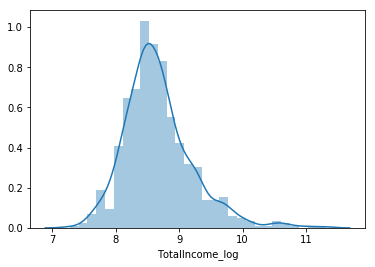

In [49]:
train["TotalIncome_log"]=np.log(train["TotalIncome"])
sns.distplot(train["TotalIncome_log"])

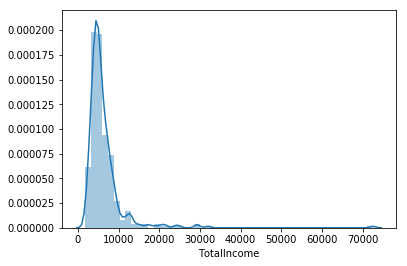

In [50]:
sns.distplot(test["TotalIncome"])

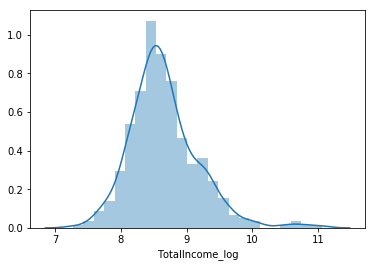

In [51]:
test["TotalIncome_log"] = np.log(train["TotalIncome"])
sns.distplot(test["TotalIncome_log"])

In [52]:
train["EMI"]=train["LoanAmount"]/train["Loan_Amount_Term"]
test["EMI"]=test["LoanAmount"]/test["Loan_Amount_Term"]

In [53]:
train[["EMI"]].head()

,EMI
0,0.355556
1,0.355556
2,0.183333
3,0.333333
4,0.391667


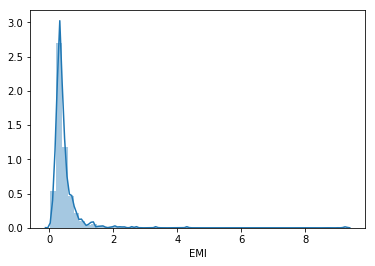

In [54]:
sns.distplot(train["EMI"])

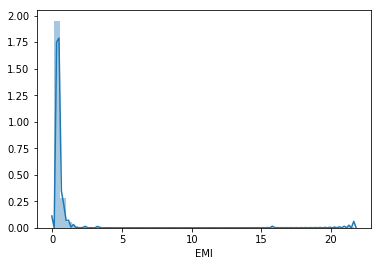

In [55]:
sns.distplot(test["EMI"])

In [56]:
train["Balance_Income"] = train["TotalIncome"]-train["EMI"]*1000 # To make the units equal we multiply with 1000
test["Balance_Income"] = test["TotalIncome"]-test["EMI"]

In [57]:
train[["Balance_Income"]].head()

,Balance_Income
0,5493.444444
1,5735.444444
2,2816.666667
3,4607.666667
4,5608.333333


In [58]:
test[["Balance_Income"]].head()

,Balance_Income
0,5719.694444
1,4575.650000
2,6799.422222
3,4885.722222
4,3275.783333


In [59]:
train=train.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [60]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_bin,LoanAmount_bin,LoanAmount_log,TotalIncome_log,EMI,Balance_Income
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,1,5849.0,High,NaN,4.852030,8.674026,0.355556,5493.444444
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,0,6091.0,Very High,Average,4.852030,8.714568,0.355556,5735.444444
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,1,3000.0,Average,Low,4.189655,8.006368,0.183333,2816.666667
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,1,4941.0,High,Average,4.787492,8.505323,0.333333,4607.666667
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,1,6000.0,High,Average,4.948760,8.699515,0.391667,5608.333333


In [61]:
test = test.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [62]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,LP001015,Male,Yes,0,Graduate,No,1.0,Urban,4.852030,5720,8.674026,0.305556,5719.694444
1,LP001022,Male,Yes,1,Graduate,No,1.0,Urban,4.852030,4576,8.714568,0.350000,4575.650000
2,LP001031,Male,Yes,2,Graduate,No,1.0,Urban,4.189655,6800,8.006368,0.577778,6799.422222
3,LP001035,Male,Yes,2,Graduate,No,1.0,Urban,4.787492,4886,8.505323,0.277778,4885.722222
4,LP001051,Male,No,0,Not Graduate,No,1.0,Urban,4.948760,3276,8.699515,0.216667,3275.783333


In [63]:
train=train.drop("Loan_ID",axis=1)
test=test.drop("Loan_ID",axis=1)

In [64]:
X=train.drop("Loan_Status",1)

In [65]:
y=train[["Loan_Status"]]

In [66]:
X = pd.get_dummies(X)
X=X.drop(['TotalIncome_bin_Low',"TotalIncome_bin_Average","TotalIncome_bin_Very High","TotalIncome_bin_High","LoanAmount_bin_Low","LoanAmount_bin_Average","LoanAmount_bin_High"],axis=1)
X.head(3)

,Credit_History,TotalIncome,LoanAmount_log,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,5849.0,4.852030,8.674026,0.355556,5493.444444,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,1.0,6091.0,4.852030,8.714568,0.355556,5735.444444,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,1.0,3000.0,4.189655,8.006368,0.183333,2816.666667,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1


In [67]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)
train=train.drop(['TotalIncome_bin_Low',"TotalIncome_bin_Average","TotalIncome_bin_Very High","TotalIncome_bin_High","LoanAmount_bin_Low","LoanAmount_bin_Average","LoanAmount_bin_High"],axis=1)
train.head()

,Credit_History,Loan_Status,TotalIncome,LoanAmount_log,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,1,5849.0,4.852030,8.674026,0.355556,5493.444444,0,1,1,...,1,0,0,1,0,1,0,0,0,1
1,1.0,0,6091.0,4.852030,8.714568,0.355556,5735.444444,0,1,0,...,0,1,0,1,0,1,0,1,0,0
2,1.0,1,3000.0,4.189655,8.006368,0.183333,2816.666667,0,1,0,...,1,0,0,1,0,0,1,0,0,1
3,1.0,1,4941.0,4.787492,8.505323,0.333333,4607.666667,0,1,0,...,1,0,0,0,1,1,0,0,0,1
4,1.0,1,6000.0,4.948760,8.699515,0.391667,5608.333333,0,1,1,...,1,0,0,1,0,1,0,0,0,1


In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3,random_state=1)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [71]:
logistic_model = LogisticRegression(random_state=1)

In [72]:
logistic_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [73]:
pred_cv_logistic=logistic_model.predict(x_cv)
score_logistic =accuracy_score(pred_cv_logistic,y_cv)*100 
score_logistic

75.13513513513513

In [74]:
pred_test_logistic = logistic_model.predict(test)

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
tree_model = DecisionTreeClassifier(random_state=1)

In [77]:
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [78]:
pred_cv_tree=tree_model.predict(x_cv)

In [79]:
score_tree =accuracy_score(pred_cv_tree,y_cv)*100 
score_tree

71.35135135135135

In [80]:
pred_test_tree = tree_model.predict(test)

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)

In [83]:
forest_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [84]:
pred_cv_forest=forest_model.predict(x_cv)

In [85]:
score_forest = accuracy_score(pred_cv_forest,y_cv)*100

In [86]:
score_forest

76.75675675675676

In [87]:
pred_test_forest=forest_model.predict(test)

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
paramgrid = {'max_depth': list(range(1,20,2)),'n_estimators':list(range(1,200,20))}

In [90]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [91]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [92]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=61, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [93]:
grid_forest_model = RandomForestClassifier(random_state=1,max_depth=3,n_estimators=101)

In [94]:
grid_forest_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=101, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [95]:
pred_grid_forest = grid_forest_model.predict(x_cv)

In [96]:
score_grid_forest = accuracy_score(pred_grid_forest,y_cv)*100

In [97]:
score_grid_forest

75.13513513513513

In [98]:
pred_grid_forest_test = grid_forest_model.predict(test)

In [99]:
from xgboost import XGBClassifier

In [100]:
xgb_model = XGBClassifier(n_estimators=50,max_depth=4)

In [101]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
       colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
       early_stopping_rounds=None, enable_categorical=False,
       eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
       importance_type=None, interaction_constraints='',
       learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
       max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
       missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
       num_parallel_tree=1, objective='binary:logistic', predictor='auto',
       random_state=0, reg_alpha=0, reg_lambda=1,
       sampling_method='uniform', scale_pos_weight=1, subsample=1,
       tree_method='exact', use_label_encoder=False, validate_parameters=1,
       verbosity=None)

In [102]:
pred_xgb=xgb_model.predict(x_cv)
x_cv.head()

,Credit_History,TotalIncome,LoanAmount_log,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
533,1.0,11250.0,5.278115,9.328123,0.544444,10705.555556,0,1,1,0,...,0,1,0,1,0,1,0,0,1,0
544,1.0,3680.0,4.624973,8.210668,0.283333,3396.666667,1,0,0,1,...,1,0,0,0,1,1,0,0,1,0
41,1.0,3013.0,3.850148,8.010692,0.130556,2882.444444,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
148,1.0,11666.0,5.416100,9.364434,0.625000,11041.000000,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
111,1.0,5262.0,4.934474,8.568266,0.386111,4875.888889,1,0,0,1,...,1,0,0,1,0,1,0,0,1,0


In [103]:
score_xgb = accuracy_score(pred_xgb,y_cv)*100

In [104]:
score_xgb

76.75675675675676

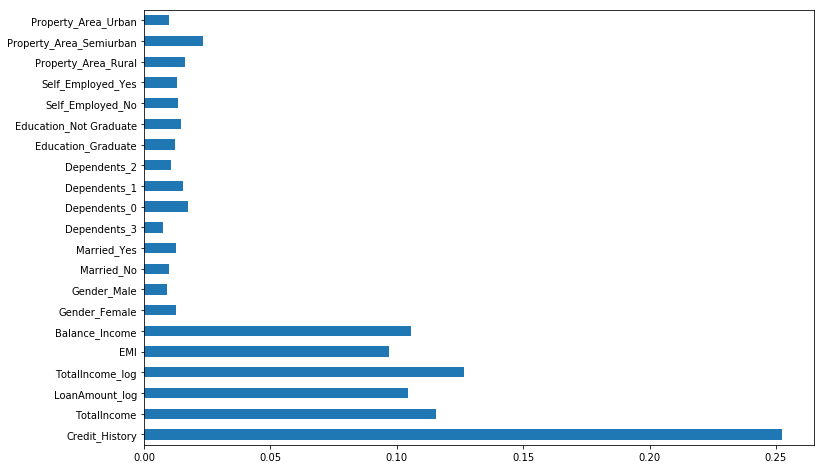

In [105]:
importances = pd.Series(forest_model.feature_importances_,index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

In [113]:
Credit_History = float(input("Have you repaid all your debts(0 for no/1 for yes): "))
TotalIncome = int(input("Enter the total income of applicant and coapplicant: "))
LoanAmount = int(input("Enter Loan amount(in thousands): "))
Period = int(input("Enter period of loan: "))
Loanlog = np.log(LoanAmount)
totalincomelog = np.log(TotalIncome)
EMI=LoanAmount/Period
balance = TotalIncome -EMI*1000
data = {"Credit_History":[Credit_History],"TotalIncome":[TotalIncome],"LoanAmount_log":[Loanlog],"TotalIncome_log":[totalincomelog],"EMI":[EMI],"Balance_Income":[balance],"Gender_Female":[0],"Gender_Male":[1],"Married_No":[0],"Married_Yes":[1],"Dependents_3":[0],"Dependents_0":[0],"Dependents_1":[1],"Dependents_2":[0],"Education_Graduate":[1],"Education_Not Graduate":[0],"Self_Employed_No":[0],"Self_Employed_Yes":[1],"Property_Area_Rural":[0],"Property_Area_Semiurban":[1],"Property_Area_Urban":[0]}
user=pd.DataFrame(data)
outp= tree_model.predict(user)
flag=0
if(outp[0]==1):
    print("Approved")
    if(Credit_History==1):
        print("Main reason is Credit History.")
        flag=1
    df1=train.loc[(train["Credit_History"]==Credit_History)&(train["Loan_Status"]==1)&(train["LoanAmount_log"]>=Loanlog-0.1*Loanlog)&(train["LoanAmount_log"]<=Loanlog+0.1*Loanlog)&(train["EMI"]>=EMI-0.1*EMI)&(train["EMI"]<=EMI+0.1*EMI)]
    meanincome=df1["TotalIncome"].mean()
    if((meanincome-0.1*meanincome<=TotalIncome)and(flag==0)):
        print("Main reason is Total income decent.")
        flag=1
    df1=train.loc[(train["Credit_History"]==Credit_History)&(train["Loan_Status"]==1)&(train["TotalIncome"]>=TotalIncome-0.1*TotalIncome)&(train["TotalIncome"]<=TotalIncome+0.1*TotalIncome)&(train["EMI"]>=EMI-0.1*EMI)&(train["EMI"]<=EMI+0.1*EMI)]
    
    if((df1["LoanAmount_log"].mean()+0.1*(df1["LoanAmount_log"].mean())>=Loanlog)and(flag==0)):
        print("Main reason is Loan amount is smaller.")
        flag=1
    df1=train.loc[(train["Credit_History"]==Credit_History)&(train["Loan_Status"]==1)&(train["TotalIncome"]>=TotalIncome-0.1*TotalIncome)&(train["TotalIncome"]<=TotalIncome+0.1*TotalIncome)&(train["LoanAmount_log"]>=Loanlog-0.1*Loanlog)&(train["LoanAmount_log"]<=Loanlog+0.1*Loanlog)]
    if((df1["EMI"].mean()+0.1*(df1["EMI"].mean())>=EMI)and(flag==0)):
        print("Main reason is EMI is smaller.")
        flag=1
    if(flag==0):
        print("Could not find the reason")

            
        
elif(outp[0]==0):
    print("Rejected")
    
    if(Credit_History==0):
        print("Main reason is Credit History.")
        flag=1
        
    df1=train.loc[(train["Credit_History"]==Credit_History)&(train["Loan_Status"]==1)&(train["LoanAmount_log"]>=Loanlog-0.1*Loanlog)&(train["LoanAmount_log"]<=Loanlog+0.1*Loanlog)&(train["EMI"]>=EMI-0.1*EMI)&(train["EMI"]<=EMI+0.1*EMI)]
    meanincome=df1["TotalIncome"].mean()
    if((meanincome-0.1*meanincome>=TotalIncome)and(flag==0)):
        print("Main reason is Total income is less.")
        flag=1
        
    df1=train.loc[(train["Credit_History"]==Credit_History)&(train["Loan_Status"]==1)&(train["TotalIncome"]>=TotalIncome-0.1*TotalIncome)&(train["TotalIncome"]<=TotalIncome+0.1*TotalIncome)&(train["EMI"]>=EMI-0.1*EMI)&(train["EMI"]<=EMI+0.1*EMI)]
    if((df1["LoanAmount_log"].mean()+0.1*(df1["LoanAmount_log"].mean())<=Loanlog)and(flag==0)):
        print("Main reason is Loan amount is Big.")
        flag=1
        
    df1=train.loc[(train["Credit_History"]==Credit_History)&(train["Loan_Status"]==1)&(train["TotalIncome"]>=TotalIncome-0.1*TotalIncome)&(train["TotalIncome"]<=TotalIncome+0.1*TotalIncome)&(train["LoanAmount_log"]>=Loanlog-0.1*Loanlog)&(train["LoanAmount_log"]<=Loanlog+0.1*Loanlog)]
    if((df1["EMI"].mean()+0.1*(df1["EMI"].mean())<=EMI)and(flag==0)):
        print("Main reason is EMI is Big.")
        flag=1
        
    if(flag==0):
        print("Could not find the reason")

    

Have you repaid all your debts(0 for no/1 for yes): 0
Enter the total income of applicant and coapplicant: 5540
Enter Loan amount(in thousands): 158
Enter period of loan: 360
Rejected
Main reason is Credit History.


In [107]:
print(importances)

Credit_History             0.252283
TotalIncome                0.115462
LoanAmount_log             0.104563
TotalIncome_log            0.126658
EMI                        0.097102
Balance_Income             0.105451
Gender_Female              0.012616
Gender_Male                0.009297
Married_No                 0.009961
Married_Yes                0.012753
Dependents_3               0.007492
Dependents_0               0.017501
Dependents_1               0.015567
Dependents_2               0.010805
Education_Graduate         0.012334
Education_Not Graduate     0.014581
Self_Employed_No           0.013491
Self_Employed_Yes          0.012925
Property_Area_Rural        0.016053
Property_Area_Semiurban    0.023245
Property_Area_Urban        0.009860
dtype: float64


In [120]:
maxvalues=train.max()
minvalues=train.min()

Loan_Score = importances["Credit_History"]*Credit_History+importances["TotalIncome"]*(TotalIncome-minvalues["TotalIncome"])/(maxvalues["TotalIncome"]-minvalues["TotalIncome"])+importances["TotalIncome_log"]*(totalincomelog-minvalues["TotalIncome_log"])/(maxvalues["TotalIncome_log"]-minvalues["TotalIncome_log"])+importances["TotalIncome_log"]*(totalincomelog-minvalues["TotalIncome_log"])/(maxvalues["TotalIncome_log"]-minvalues["TotalIncome_log"])

Loan_Score*=100
print(round(Loan_Score))

9.0
